## Prerequisites
- Python
- numpy array
- graph theory -- data structures

# Networkx 

In [4]:
import networkx as nx
print(nx.__version__)

3.0


- [Docs](https://networkx.org/)
- [Introduction](https://networkx.org/documentation/stable/reference/introduction.html)
- [Tutorial](https://networkx.org/documentation/stable/tutorial.html)

## Creating a graph
https://networkx.org/documentation/stable/reference/classes/index.html

In [6]:
# Creating a graph
G = nx.Graph() # Undirected graph
DG = nx.DiGraph() # Directed graph
MG = nx.MultiGraph() # Multiple edges between same pairs of nodes
MDG = nx.MultiDiGraph()

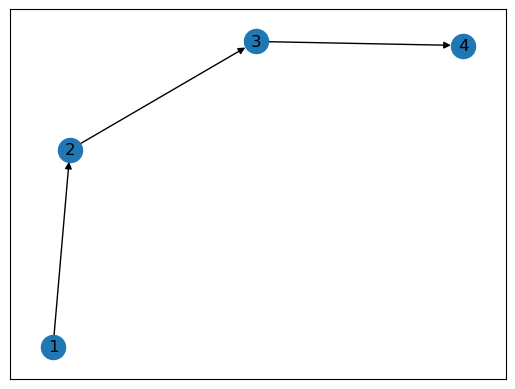

In [7]:
DG = nx.DiGraph([(1, 2), (2, 3), (3, 4)]) # Create from edge_list
nx.draw_networkx(DG)

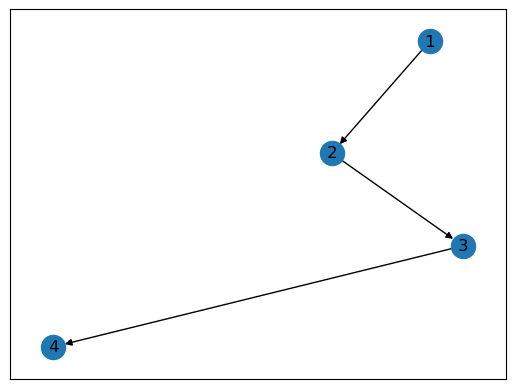

In [15]:
## Adding nodes and edges
DG = nx.DiGraph()
DG.add_node(1)
DG.add_nodes_from([2, 3, 4])
DG.add_edge(1, 2)
DG.add_edges_from([(2, 3), (3, 4)])
nx.draw_networkx(DG)


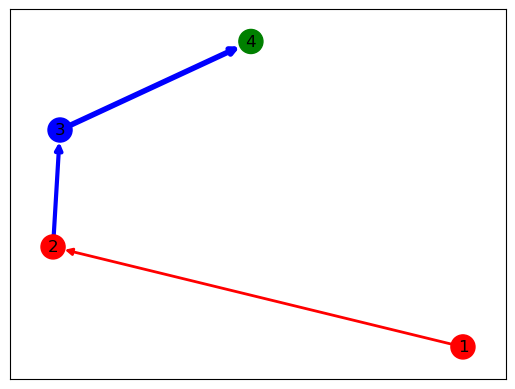

In [16]:
# Nodes and edges can have attributes
## Adding nodes and edges
DG = nx.DiGraph()

DG.add_node(1, color = "red")
DG.add_nodes_from([
    (2, {"color": "red"}),
    (3, {"color": "blue"}),
    (4, {"color": "green"})
])

DG.add_edge(1, 2, weight = 2, color = 'red')
DG.add_weighted_edges_from([(2, 3, 3), (3, 4, 4)], color = "blue") # all edges have the same color attr

node_colors = [n['color'] for n in DG.nodes.values()]
edge_colors = [e['color'] for e in DG.edges.values()]
edge_weights = [e['weight'] for e in DG.edges.values()]

nx.draw_networkx(DG, node_color = node_colors, width = edge_weights, edge_color = edge_colors)


In [18]:
nx.to_dict_of_dicts(DG)

{1: {2: {'weight': 2, 'color': 'red'}},
 2: {3: {'color': 'blue', 'weight': 3}},
 3: {4: {'color': 'blue', 'weight': 4}},
 4: {}}

### Inspecting a graph
https://networkx.org/documentation/stable/reference/functions.html#

In [31]:
## Views
print(DG.nodes, type(DG.nodes))
print(DG.degree)
print(DG.edges)

print(DG.number_of_edges())
print(DG.number_of_nodes())

[1, 2, 3, 4] <class 'networkx.classes.reportviews.NodeView'>
[(1, 1), (2, 2), (3, 2), (4, 1)]
[(1, 2), (2, 3), (3, 4)]
3
4


In [142]:
## Accessing node and edge data
print(DG.nodes[1])
print(DG.edges[(1, 2)]) # same as DG[1][2]

# More data about nodes
print()
print(list(DG.neighbors(1)))
print("Degrees")
print(DG.degree)
print(DG.in_degree)
print(DG.out_degree)


# More data about edges
print()
print(DG.get_edge_data(1, 2))

{'color': 'red'}
{'weight': 2, 'color': 'red'}

[2]
Degrees
[(1, 1), (2, 2), (3, 2), (4, 1)]
[(1, 0), (2, 1), (3, 1), (4, 1)]
[(1, 1), (2, 1), (3, 1), (4, 0)]

{'weight': 2, 'color': 'red'}


[2, 3, 4]
[(3, 4)]


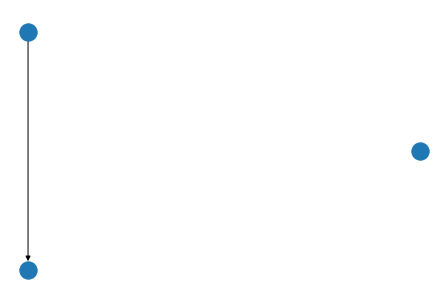

In [125]:
## Remove nodes
DG.remove_node(1)
print(list(DG.nodes))
DG.remove_edge(2, 3)
print(DG.edges)

nx.draw_circular(DG) # Different methods to draw, check docs

## Graph generators
https://networkx.org/documentation/stable/reference/generators.html

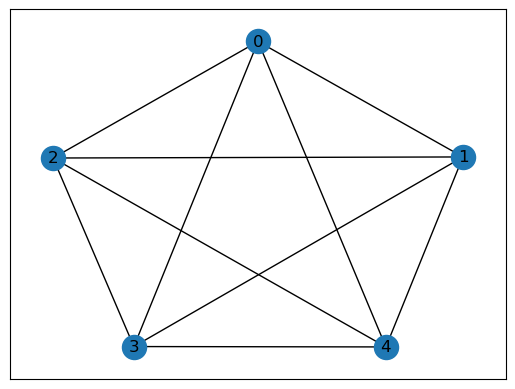

In [34]:
G = nx.complete_graph(5)
nx.draw_networkx(G)

### Read and write
- Converting data in different formats -- https://networkx.org/documentation/stable/reference/convert.html 
- Read and write -- https://networkx.org/documentation/stable/reference/readwrite/index.html


In [35]:
import os

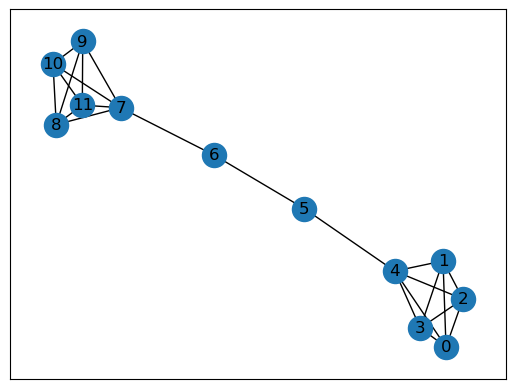

In [36]:
G = nx.barbell_graph(5, 2) # two complete graphs connected by a path.
nx.draw_networkx(G)

In [37]:
adj = nx.adjacency_matrix(G) # Sparse format
print(adj.todense())

nx.write_adjlist(G, os.path.join('data', 'test.adjlist'))
G_ = nx.read_adjlist(os.path.join('data', 'test.adjlist')) # Note: edges are read as strings now

[[0 1 1 1 1 0 0 0 0 0 0 0]
 [1 0 1 1 1 0 0 0 0 0 0 0]
 [1 1 0 1 1 0 0 0 0 0 0 0]
 [1 1 1 0 1 0 0 0 0 0 0 0]
 [1 1 1 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 1 1 1]
 [0 0 0 0 0 0 0 1 0 1 1 1]
 [0 0 0 0 0 0 0 1 1 0 1 1]
 [0 0 0 0 0 0 0 1 1 1 0 1]
 [0 0 0 0 0 0 0 1 1 1 1 0]]


In [38]:
list(nx.generate_edgelist(G))

['0 1 {}',
 '0 2 {}',
 '0 3 {}',
 '0 4 {}',
 '1 2 {}',
 '1 3 {}',
 '1 4 {}',
 '2 3 {}',
 '2 4 {}',
 '3 4 {}',
 '4 5 {}',
 '5 6 {}',
 '6 7 {}',
 '7 8 {}',
 '7 9 {}',
 '7 10 {}',
 '7 11 {}',
 '8 9 {}',
 '8 10 {}',
 '8 11 {}',
 '9 10 {}',
 '9 11 {}',
 '10 11 {}']

# Resources

- [More examples](https://networkx.org/documentation/stable/auto_examples/index.html)
